# Our World in Data CO2 Emissions Analysis

### Data source

- My data is from [Our World in Data](https://ourworldindata.org/). The file can be downloaded [here](https://github.com/owid/co2-data).

### Importing core data science libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import matplotlib
from matplotlib.pyplot import figure
matplotlib.rcParams['figure.figsize'] = (9,6)

### Importing data

In [2]:
# Importing data from txt file to dataframe
df = pd.read_csv("data/owid-co2-data.txt", sep = "\t", encoding='utf8')

### Data inspection

- Taking a look at the columns:

In [3]:
# Showing all columns
df.columns

Index(['iso_code', 'country', 'year', 'co2', 'consumption_co2',
       'co2_growth_prct', 'co2_growth_abs', 'trade_co2', 'co2_per_capita',
       'consumption_co2_per_capita', 'share_global_co2', 'cumulative_co2',
       'share_global_cumulative_co2', 'co2_per_gdp', 'consumption_co2_per_gdp',
       'co2_per_unit_energy', 'coal_co2', 'cement_co2', 'flaring_co2',
       'gas_co2', 'oil_co2', 'other_industry_co2', 'cement_co2_per_capita',
       'coal_co2_per_capita', 'flaring_co2_per_capita', 'gas_co2_per_capita',
       'oil_co2_per_capita', 'other_co2_per_capita', 'trade_co2_share',
       'share_global_cement_co2', 'share_global_coal_co2',
       'share_global_flaring_co2', 'share_global_gas_co2',
       'share_global_oil_co2', 'share_global_other_co2',
       'cumulative_cement_co2', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_oil_co2',
       'cumulative_other_co2', 'share_global_cumulative_cement_co2',
       'share_global_cumulative_c

Note that CO2 values are measured in million tonnes while CO2 per capita values are measured in tonnes per person.

- Showing the first five rows:

In [4]:
# Showing first five rows
df.head()

,iso_code,country,year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
0,AFG,Afghanistan,1949,0.015,NaN,NaN,NaN,NaN,0.002,NaN,...,NaN,NaN,NaN,NaN,NaN,7624058.0,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1950,0.084,NaN,475.0,0.070,NaN,0.011,NaN,...,NaN,NaN,NaN,NaN,NaN,7752117.0,9.421400e+09,NaN,NaN,NaN
2,AFG,Afghanistan,1951,0.092,NaN,8.7,0.007,NaN,0.012,NaN,...,NaN,NaN,NaN,NaN,NaN,7840151.0,9.692280e+09,NaN,NaN,NaN
3,AFG,Afghanistan,1952,0.092,NaN,0.0,0.000,NaN,0.012,NaN,...,NaN,NaN,NaN,NaN,NaN,7935996.0,1.001732e+10,NaN,NaN,NaN
4,AFG,Afghanistan,1953,0.106,NaN,16.0,0.015,NaN,0.013,NaN,...,NaN,NaN,NaN,NaN,NaN,8039684.0,1.063052e+10,NaN,NaN,NaN


- Showing five randomly selected rows:

In [5]:
# Showing five randomly selected rows
df.sample(n=5)

,iso_code,country,year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
15132,MAR,Morocco,1983,17.627,NaN,4.27,0.722,NaN,0.820,NaN,...,NaN,NaN,NaN,NaN,NaN,21495088.0,7.482539e+10,62.285,2897.65,0.712
3500,VGB,British Virgin Islands,1975,0.026,NaN,0.00,0.000,NaN,2.398,NaN,...,NaN,NaN,NaN,NaN,NaN,10697.0,NaN,NaN,NaN,NaN
1053,NaN,Asia,1830,0.002,NaN,NaN,NaN,NaN,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,790835895.0,NaN,NaN,NaN,NaN
22125,TJK,Tajikistan,1842,NaN,NaN,0.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,570540.0,NaN,NaN,NaN,NaN
2349,BLR,Belarus,1851,NaN,NaN,0.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3126490.0,NaN,NaN,NaN,NaN


- Showing columns and their corresponding data types:

In [6]:
# Showing columns and data types
df.dtypes

iso_code                                object
country                                 object
year                                     int64
co2                                    float64
consumption_co2                        float64
co2_growth_prct                        float64
co2_growth_abs                         float64
trade_co2                              float64
co2_per_capita                         float64
consumption_co2_per_capita             float64
share_global_co2                       float64
cumulative_co2                         float64
share_global_cumulative_co2            float64
co2_per_gdp                            float64
consumption_co2_per_gdp                float64
co2_per_unit_energy                    float64
coal_co2                               float64
cement_co2                             float64
flaring_co2                            float64
gas_co2                                float64
oil_co2                                float64
other_industr

### Data manipulation

Alterations to make:

1. There are many columns that are not needed.
2. The data set includes data for non-country entities(ie. North America, Asia, World). We want to remove the rows for these values.
3. The beginning year is not consistent. We want the beginning year to be the same for all countries.

- Filtering out unneeded columns:

In [7]:
# Including only the columns I need
df = df[['iso_code', 'country', 'year', 'co2', 'coal_co2', 'cement_co2', 'flaring_co2', 'gas_co2', 'oil_co2', 'other_industry_co2', 'co2_per_capita', 'population', 'gdp']]

- The dataset includes data for continents and regions, which do not have an ISO code. I will only be analyzing by country, so I can drop all rows with NaN values in the iso_code column:

In [8]:
# Dropping rows with NaN for ISO Code
df = df.dropna(subset=['iso_code'])

- The World (World Total) rows have an ISO code, so I drop these separately:

In [9]:
# Dropping the World rows
df = df.drop(df[df['iso_code'] == "OWID_WRL"].index)

- Setting the beginning year to 1950:

In [10]:
# Filtering out years before 1950
df = df[df.year >= 1950]

- Creating new file with cleaned data:

In [11]:
df.to_csv('data/cleaned-owid-co2-data.txt', encoding='utf-8', sep='\t')

The file can be found in the data folder.

### Data analysis

- Showing countries with highest CO2 emissions in 1970:

In [12]:
# Showing table for top 10 CO2 emitting countries for 1970 in descending order
df[df.year == 1970].sort_values(by='co2', ascending = False).head(10)

,iso_code,country,year,co2,coal_co2,cement_co2,flaring_co2,gas_co2,oil_co2,other_industry_co2,co2_per_capita,population,gdp
24017,USA,United States,1970,4339.471,1168.091,34.709,26.249,1059.211,2038.082,13.13,20.712,209513340.0,4.912640e+12
18965,RUS,Russia,1970,1437.871,702.837,28.511,NaN,221.804,484.719,NaN,11.048,130148650.0,1.202690e+12
9540,DEU,Germany,1970,1026.022,603.234,22.889,NaN,29.766,370.134,NaN,13.057,78578381.0,1.343860e+12
4673,CHN,China,1970,807.953,665.866,10.718,NaN,5.503,94.645,31.22,0.976,827601385.0,1.144000e+12
11986,JPN,Japan,1970,767.963,229.264,28.267,0.040,7.676,502.715,NaN,7.319,104929260.0,1.615680e+12
23796,GBR,United Kingdom,1970,652.577,352.909,8.432,2.957,23.105,265.175,NaN,11.743,55573455.0,9.547560e+11
8707,FRA,France,1970,459.523,152.805,14.337,NaN,19.749,272.632,NaN,9.052,50763921.0,9.442330e+11
23463,UKR,Ukraine,1970,455.567,281.326,7.726,NaN,49.418,117.097,NaN,9.675,47088862.0,NaN
4230,CAN,Canada,1970,341.177,58.815,3.562,4.804,62.625,211.372,NaN,15.962,21374326.0,4.177520e+11
18216,POL,Poland,1970,304.143,261.488,6.018,NaN,10.915,25.722,NaN,9.318,32639262.0,2.295690e+11


- Showing countries with highest CO2 emissions in 2020:

In [13]:
# Showing table for top 10 CO2 emitting countries for 2020 in descending order
df[df.year == 2020].sort_values(by='co2', ascending = False).head(10)

,iso_code,country,year,co2,coal_co2,cement_co2,flaring_co2,gas_co2,oil_co2,other_industry_co2,co2_per_capita,population,gdp
4723,CHN,China,2020,10667.887,7421.101,858.233,NaN,605.254,1611.762,171.539,7.412,1.439324e+09,NaN
24067,USA,United States,2020,4712.771,888.649,40.795,84.510,1654.988,2020.538,23.291,14.238,3.310026e+08,NaN
10977,IND,India,2020,2441.792,1587.552,122.908,1.678,126.984,602.670,NaN,1.769,1.380004e+09,NaN
19015,RUS,Russia,2020,1577.136,356.946,20.306,46.762,747.591,388.774,16.757,10.807,1.459345e+08,NaN
12036,JPN,Japan,2020,1030.775,402.979,25.376,0.393,216.544,377.382,8.102,8.150,1.264765e+08,NaN
11295,IRN,Iran,2020,745.035,5.114,23.877,60.225,434.227,221.592,NaN,8.870,8.399295e+07,NaN
9590,DEU,Germany,2020,644.310,199.077,13.287,2.017,170.733,250.681,8.515,7.690,8.378394e+07,NaN
19687,SAU,Saudi Arabia,2020,625.508,NaN,25.593,0.095,257.220,342.599,NaN,17.967,3.481387e+07,NaN
21008,KOR,South Korea,2020,597.605,282.883,22.871,NaN,114.831,166.717,10.303,11.656,5.126918e+07,NaN
11109,IDN,Indonesia,2020,589.500,300.518,33.804,11.091,78.478,165.610,NaN,2.155,2.735236e+08,NaN


- Showing China's CO2 emissions from 1970-2020:

In [14]:
# Showing China's CO2 emissions from 1970 to 2020 in intervals of 5 years
df[(df.country == 'China') & ((df.year >= 1970) & (df.year % 5 == 0))]

,iso_code,country,year,co2,coal_co2,cement_co2,flaring_co2,gas_co2,oil_co2,other_industry_co2,co2_per_capita,population,gdp
4673,CHN,China,1970,807.953,665.866,10.718,NaN,5.503,94.645,31.220,0.976,8.276014e+08,1.144000e+12
4678,CHN,China,1975,1183.215,906.638,19.102,1.905,16.972,204.191,34.406,1.277,9.262409e+08,1.460730e+12
4683,CHN,China,1980,1494.496,1122.664,32.712,3.012,27.319,273.202,35.586,1.494,1.000089e+09,1.893780e+12
4688,CHN,China,1985,1998.083,1584.511,59.301,NaN,24.820,284.594,44.857,1.858,1.075589e+09,2.752670e+12
4693,CHN,China,1990,2484.855,1976.684,84.513,NaN,29.301,330.291,64.065,2.111,1.176884e+09,3.385120e+12
4698,CHN,China,1995,3357.909,2569.754,184.637,NaN,42.436,468.230,92.852,2.706,1.240921e+09,4.810000e+12
4703,CHN,China,2000,3439.152,2396.426,244.388,NaN,59.796,648.685,89.857,2.665,1.290551e+09,5.952680e+12
4708,CHN,China,2005,5876.555,4424.390,411.649,NaN,84.957,850.173,105.387,4.416,1.330776e+09,8.602940e+12
4713,CHN,China,2010,8616.653,6568.794,639.592,NaN,199.585,1092.572,116.110,6.295,1.368811e+09,1.285880e+13
4718,CHN,China,2015,9848.420,7266.979,721.995,NaN,366.649,1327.578,165.219,7.000,1.406848e+09,1.671090e+13


- Showing USA's CO2 emissions from 1970-2020:

In [15]:
# Showing USA's CO2 emissions from 1970 to 2020 in intervals of 5 years
df[(df.country == 'United States') & ((df.year >= 1970) & (df.year % 5 == 0))]

,iso_code,country,year,co2,coal_co2,cement_co2,flaring_co2,gas_co2,oil_co2,other_industry_co2,co2_per_capita,population,gdp
24017,USA,United States,1970,4339.471,1168.091,34.709,26.249,1059.211,2038.082,13.130,20.712,209513340.0,4.912640e+12
24022,USA,United States,1975,4478.038,1168.057,30.276,7.112,992.428,2267.402,12.763,20.440,219081250.0,5.605800e+12
24027,USA,United States,1980,4808.296,1484.466,32.719,6.690,1017.996,2253.808,12.616,20.953,229476360.0,6.743210e+12
24032,USA,United States,1985,4652.383,1684.175,31.513,5.100,890.373,2030.806,10.416,19.345,240499822.0,7.874870e+12
24037,USA,United States,1990,5113.455,1841.986,33.484,41.757,1033.673,2138.355,24.199,20.282,252120309.0,9.250380e+12
24042,USA,United States,1995,5421.502,1942.302,37.075,39.410,1194.544,2180.865,27.305,20.446,265163740.0,1.051030e+13
24047,USA,United States,2000,6010.508,2179.839,41.445,36.182,1257.599,2469.140,26.303,21.336,281710914.0,1.297380e+13
24052,USA,United States,2005,6134.521,2214.838,46.194,37.244,1199.296,2608.477,28.473,20.795,294993509.0,1.470370e+13
24057,USA,United States,2010,5675.786,2013.304,31.449,41.343,1308.832,2250.504,30.354,18.368,309011469.0,1.527060e+13
24062,USA,United States,2015,5371.771,1504.946,39.907,61.546,1495.321,2239.490,30.560,16.741,320878312.0,1.690260e+13


- Showing countries with highest CO2 per capita values in 2020:

In [16]:
# Showing table for top 10 CO2 per capita countries for 2020 in descending order
df[df.year == 2020].sort_values(by='co2_per_capita', ascending = False).head(10)

,iso_code,country,year,co2,coal_co2,cement_co2,flaring_co2,gas_co2,oil_co2,other_industry_co2,co2_per_capita,population,gdp
18590,QAT,Qatar,2020,106.655,NaN,2.305,1.154,90.164,13.032,NaN,37.019,2881060.0,NaN
15761,NCL,New Caledonia,2020,8.693,5.77,0.033,NaN,NaN,2.889,NaN,30.448,285491.0,NaN
14881,MNG,Mongolia,2020,88.442,83.61,0.414,NaN,NaN,4.417,NaN,26.978,3278292.0,NaN
22737,TTO,Trinidad and Tobago,2020,35.509,NaN,0.252,NaN,31.136,4.122,NaN,25.373,1399491.0,NaN
3633,BRN,Brunei,2020,10.158,NaN,NaN,0.663,7.529,1.967,NaN,23.220,437483.0,NaN
12517,KWT,Kuwait,2020,88.935,NaN,1.572,1.729,41.448,44.186,NaN,20.825,4270563.0,NaN
2159,BHR,Bahrain,2020,34.960,NaN,0.524,NaN,30.830,3.606,NaN,20.546,1701583.0,NaN
5495,CUW,Curacao,2020,3.335,NaN,NaN,NaN,0.116,3.219,NaN,20.323,164100.0,NaN
19687,SAU,Saudi Arabia,2020,625.508,NaN,25.593,0.095,257.220,342.599,NaN,17.967,34813867.0,NaN
12298,KAZ,Kazakhstan,2020,291.336,171.63,3.800,14.622,48.146,50.159,2.978,15.516,18776707.0,NaN


### Pandas visualizations

- Creating a line graph showing global CO2 emissions from 1950-2020:

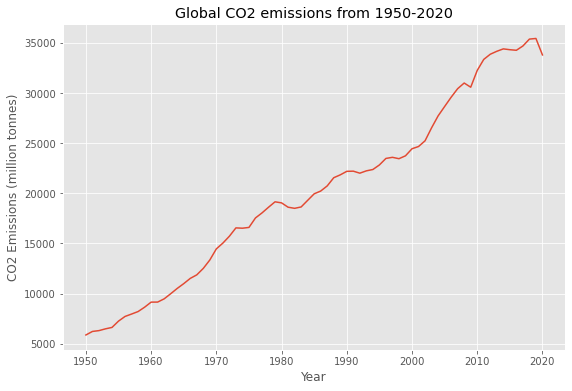

In [17]:
# Creating new data frame containing years and CO2 values
df_year_co2 = df[['year', 'co2']]

# Creating new data frame then summing CO2 emissions for each year to get global emissions
df_world_co2 = df_year_co2.groupby('year').sum()

# Creating new list for the CO2 data
world_co2 = df_world_co2['co2'].values.tolist()

# Creating list containing unique year values from the data frame
year = df.year.unique()

# Creating new data frame with world CO2 and year values
df_world_line = pd.DataFrame(
    {'World': world_co2,
    'Year': year
    }
)

# Plotting graph
plt.plot(df_world_line['Year'], df_world_line['World'])
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (million tonnes)')
plt.title('Global CO2 emissions from 1950-2020')
plt.show()

- Creating a line graph showing the CO2 emissions of China and USA from 1950-2020:

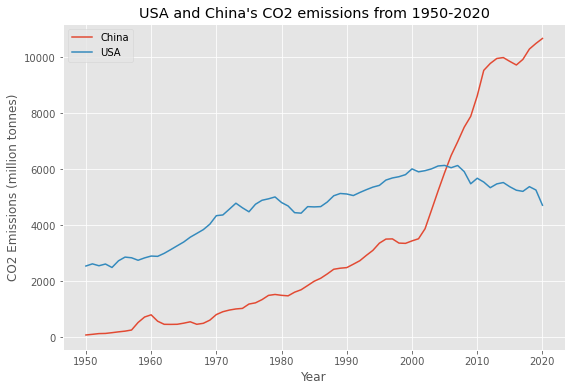

In [18]:
# Creating new data frame for each country
df_usa = df[(df.country == 'United States')]
df_china = df[(df.country == 'China')]

# Creating a list for each country's CO2 values
usa_co2 = df_usa['co2'].values.tolist()
china_co2 = df_china['co2'].values.tolist()

# Creating a new data frame with USA CO2, China CO2 and year values
df_line = pd.DataFrame(
    { 'USA': usa_co2,
    'China': china_co2,
    'Year': year 
    }
)

# Plotting graph
plt.plot(df_line['Year'], df_line['China'], label='China')
plt.plot(df_line['Year'], df_line['USA'], label='USA')
plt.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (million tonnes)')
plt.title('USA and China\'s CO2 emissions from 1950-2020')
plt.show()

 - Creating a bar graph showing the ten countries with highest CO2 emissions in 2020:

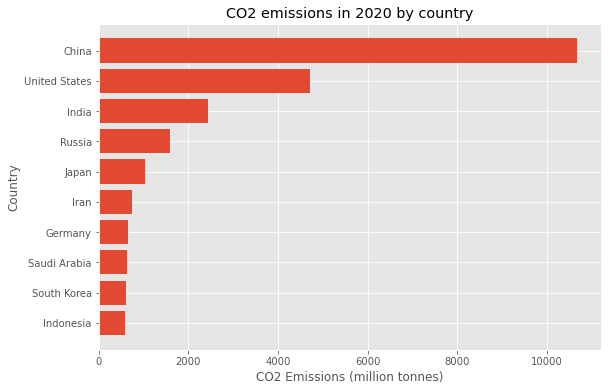

In [19]:
# Creating new data frame for the top 10 CO2 emitting countries
df_co2_2020 = df[df.year == 2020].sort_values(by='co2', ascending = False).head(10)

# Filtering unneeded columns
df_co2_2020 = df_co2_2020[['country', 'co2']]

# Plotting the graph
plt.barh(df_co2_2020['country'], df_co2_2020['co2'])
plt.xlabel('CO2 Emissions (million tonnes)')
plt.ylabel('Country')
plt.title('CO2 emissions in 2020 by country')
plt.gca().invert_yaxis()
plt.show()

- Creating a bar graph showing the ten countries with highest CO2 per capita emissions in 2020:

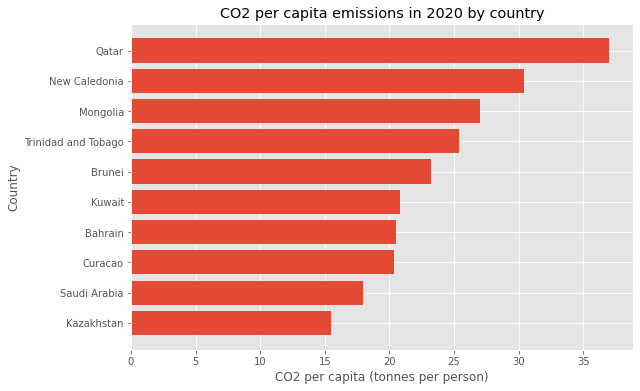

In [20]:
# Creating new data frame for the top 10 CO2 per capita countries
df_co2_percapita_2020 = df[df.year == 2020].sort_values(by='co2_per_capita', ascending = False).head(10)

# Filtering unneeded columns
df_co2_percapita_2020 = df_co2_percapita_2020[['country', 'co2_per_capita']]

# Plotting the graph
plt.barh(df_co2_percapita_2020['country'], df_co2_percapita_2020['co2_per_capita'])
plt.xlabel('CO2 per capita (tonnes per person)')
plt.ylabel('Country')
plt.title('CO2 per capita emissions in 2020 by country')
plt.gca().invert_yaxis()
plt.show()

### [Tableau dashboard with more visualizations](https://public.tableau.com/views/OWIDco2data/Sheet1?:language=en-US&:display_count=n&:origin=viz_share_link)